<a href="https://colab.research.google.com/github/ischmidl-nd/dump/blob/main/Manim_v0_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://raw.githubusercontent.com/ManimCommunity/manim/master/logo/cropped.png">
</p>

# Manim v0.3.0

The full changelog can be found at https://docs.manim.community/en/v0.3.0/changelog.html#v0-3-0.

This is a Collab Notebook where you can try all the _features_ released in this version.

[**Code Of Conduct**](https://docs.manim.community/en/v0.3.0/conduct.html)

In [1]:
#@title # Install Manim First
#@markdown This install Manim and its dependencies.

#@markdown Click on the restart runtime button below before continuing.
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install -U manim==0.3.0
!pip install IPython --upgrade

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,866 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.nvidia.com/compute/mac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 14.5 MB/s 
     |████████████████████████████████| 381 kB 48.3 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: IPython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [1]:
#@markdown First Import Manim
from manim import *

## [#943](https://github.com/ManimCommunity/manim/pull/943): IPython %%manim magic

Now, Manim can run directly on notebooks using the `%%manim` magic.

In [2]:
%%manim SquareToCircle -qm -v WARNING

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        square.flip(RIGHT)
        square.rotate(-3 * TAU / 8)
        circle.set_fill(PINK, opacity=0.5)

        self.play(ShowCreation(square))
        self.play(Transform(square, circle))
        self.play(FadeOut(square))

## [#970](https://github.com/ManimCommunity/manim/pull/970): New command to get Manim's version.
```sh
manim --version
```

In [ ]:
#@markdown Collab uses `!` for running shell Commands
!manim --version

## [#948](https://github.com/ManimCommunity/manim/pull/948): Code strings can now be passed to [`Code`](https://docs.manim.community/en/v0.3.0/reference/manim.mobject.svg.code_mobject.Code.html#manim.mobject.svg.code_mobject.Code)

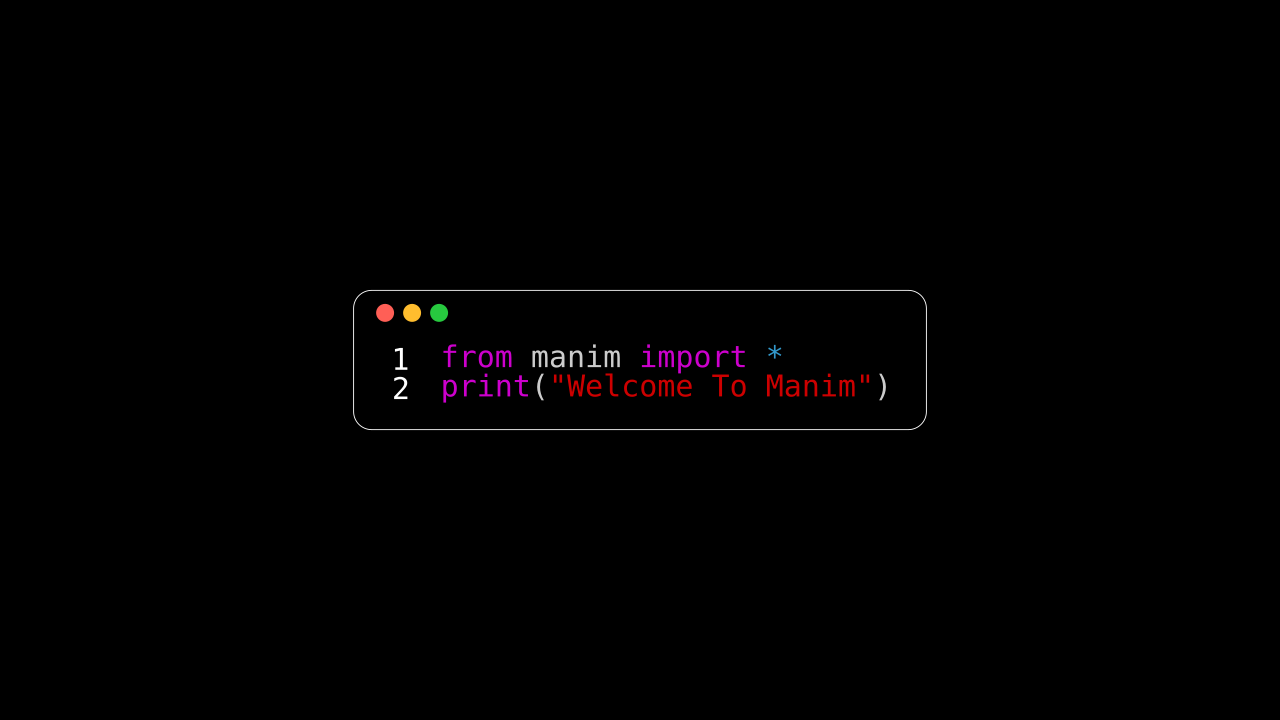

In [3]:
%%manim CodeString -qm -s -v WARNING
codestring = \
"""
from manim import *
print("Welcome To Manim")
"""
class CodeString(Scene):
    def construct(self):
        code = Code(
            code=codestring,
            tab_width=4,
            background="window",
            language="Python",
            font="Monospace"
        )
        self.add(code)

## [#917](https://github.com/ManimCommunity/manim/pull/917): Allow overriding new-style method animations

See https://docs.manim.community/en/v0.3.0/reference/manim.mobject.mobject.html#manim.mobject.mobject.override_animate for some more detailed documentation.

In [4]:
%%manim AnimationOverrideExample -qm -v WARNING

class CircleWithContent(VGroup):
    def __init__(self, content):
        super().__init__()
        self.circle = Circle()
        self.content = content
        self.add(self.circle, content)
        content.move_to(self.circle.get_center())

    def clear_content(self):
        self.remove(self.content)
        self.content = None

    @override_animate(clear_content)
    def _clear_content_animation(self):
        anim = Uncreate(self.content)
        self.clear_content()
        return anim

class AnimationOverrideExample(Scene):
    def construct(self):
        t = Text("hello!")
        my_mobject = CircleWithContent(t)
        self.play(ShowCreation(my_mobject))
        self.play(my_mobject.animate.clear_content())
        self.wait()

## [#939](https://github.com/ManimCommunity/manim/pull/939): Support for custom font files

In [ ]:
#@markdown First Download The Font Orbitron
!curl -L https://fonts.google.com/download?family=Orbitron -o orbitron.zip
!7z x orbitron.zip -aoa

In [ ]:
%%manim CustomFont -qm -p -v WARNING --disable_caching

class CustomFont(Scene):
    def construct(self):
        with register_font("Orbitron-VariableFont_wght.ttf"):
            a=Text("Hello, this is Orbitron!",font="Orbitron")
        self.play(Write(a))

## [#892](https://github.com/ManimCommunity/manim/pull/892): Allow importing ManimCommunity Logo colors

Now, you can import the colours used in our logo using the following import
```py
from manim.communitycolors import *
```


## [#742](https://github.com/ManimCommunity/manim/pull/742): Introduction of new and easier handling of Units: Pixels, Munits, Percent in `unit`

In [5]:
%%manim UnitDot -qm -v WARNING --disable_caching

from manim import unit

def make_dot(c):
    return Dot(radius=0.2, color=c)

class UnitDot(Scene):
    def construct(self):
        dot1 = make_dot(RED).shift(UP)
        dot2 = make_dot(BLUE)
        dot3 = make_dot(GREEN).shift(DOWN)
        self.add(dot1, dot2, dot3)

        self.play(
            dot1.animate.shift(3.55 * unit.Munits * RIGHT),
            dot2.animate.shift(320 * unit.Pixels * RIGHT),
            dot3.animate.shift(25 * unit.Percent(X_AXIS) * RIGHT)
        )

        self.wait()

## [#916](https://github.com/ManimCommunity/manim/pull/916): Multi-column layout for partite graphs

In [6]:
%%manim MultiColumn -qm -v WARNING

class MultiColumn(Scene):
    def construct(self):
        graph = Graph(vertices=[0, 1, 2, 3, 4, 5, 6, 7],
                      edges=[(0, 4), (0, 6), (1, 6), (2, 5), (3, 7)],
                      layout="partite",
                      partitions=[[0, 1, 2, 3]])
        self.play(ShowCreation(graph))
        self.play(FadeOut(graph))

        # nodes not specified in any of the partitions will form their own partition
        graph = Graph(vertices=[0, 1, 2, 3, 4, 5, 6, 7],
                      edges=[(0, 2), (0, 3), (3, 6), (1, 2), (5, 7)],
                      layout="partite",
                      partitions=[[0, 1], [2, 3], [4, 5]])
        self.play(ShowCreation(graph))
        self.play(FadeOut(graph))

        layers = [[0], [1, 2, 3], [4, 5, 6, 7], [8, 9], [10]]
        edges = []
        for j in range(len(layers) - 1):
            edges.extend([(a, b) for a in layers[j] for b in layers[j+1]])
        graph = Graph(vertices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                      edges=edges,
                      layout="partite",
                      layout_scale=4,
                      partitions=layers)
        self.play(ShowCreation(graph))
        self.play(FadeOut(graph))

## [#945](https://github.com/ManimCommunity/manim/pull/945): The [`Graph Mobject`](https://docs.manim.community/en/v0.3.0/reference/manim.mobject.graph.Graph.html#manim.mobject.graph.Graph) has a [`change_layout()`](https://docs.manim.community/en/v0.3.0/reference/manim.mobject.graph.Graph.html#manim.mobject.graph.Graph.change_layout) method now, and
## [#922](https://github.com/ManimCommunity/manim/pull/922): Tree layout for Graph mobject


In [7]:
%%manim ChangeGraphLayout -qm -v WARNING

class ChangeGraphLayout(Scene):
    def construct(self):
        G = Graph(
            [1, 2, 3, 4, 5, 6, 7, 8],
            [(1, 2), (2, 3), (3, 4), (4, 5), (1, 6), (6, 7), (6, 8)],
            layout="tree",
            layout_scale=5,
            root_vertex=1,
            labels=True,
        )
        self.play(ShowCreation(G))
        self.wait()
        for root in range(2, 9):
            self.play(G.animate.change_layout("tree", layout_scale=5, root_vertex=root))
            self.wait(0.5)

        for lt in ["circular", "spring", "planar", "shell", "spiral"]:
            self.play(G.animate.change_layout(lt))
            self.wait(0.5)

        self.play(G.animate.change_layout("tree", layout_scale=5, root_vertex=1))
        self.play(FadeOut(G))

## [#893](https://github.com/ManimCommunity/manim/pull/893): Convenience method from_networkx() for creating a graph from a networkx graph

In [8]:
%%manim ImportNetworkxGraph -qm -p -v WARNING --disable_caching

import networkx as nx
nxgraph = nx.erdos_renyi_graph(14, 0.5)
class ImportNetworkxGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(ShowCreation(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                   for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))